In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
from figure import plots


In [3]:
def assign_vals(table, cols, new_col):
    for i, c in enumerate(cols):
        new_c = new_col[i]
        table[new_c] = 0
        for tid in table.index:
            data = pd.read_csv('./Dataset/Data/%s.tsv'%tid, sep='\t', index_col=0)
            table.loc[tid, new_c] = data[c].max()

    return table


def LoadData():
    
    dir_score = './Score_wodirection_trtssplit/'
    file = 'mean.tsv'        
        
    svm     = pd.read_csv(dir_score + 'SVM/'            + file, sep='\t', index_col=0)
    xgb     = pd.read_csv(dir_score + 'XGBoost/'        + file, sep='\t', index_col=0)
    rf      = pd.read_csv(dir_score + 'Random_Forest/'  + file, sep='\t', index_col=0)
    fcn     = pd.read_csv(dir_score + 'FCNN/'           + file, sep='\t', index_col=0)
    fcn_sep = pd.read_csv(dir_score + 'FCNN_separated/' + file, sep='\t', index_col=0)
    mpn     = pd.read_csv(dir_score + 'MPNN/'           + file, sep='\t', index_col=0)
    mpn_sep = pd.read_csv(dir_score + 'MPNN_separated/' + file, sep='\t', index_col=0)
    nn1     = pd.read_csv(dir_score + '1NN/SVM/'        + file, sep='\t', index_col=0)
    nn5     = pd.read_csv(dir_score + '5NN/SVM/'        + file, sep='\t', index_col=0)


    svm     = assign_vals(svm, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    xgb     = assign_vals(xgb, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    rf      = assign_vals(rf , cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    fcn     = assign_vals(fcn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    fcn_sep = assign_vals(fcn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    mpn     = assign_vals(mpn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    mpn_sep = assign_vals(mpn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    nn1     = assign_vals(nn1, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    nn5     = assign_vals(nn5, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])


    svm['model']     = 'svm'
    xgb['model']     = 'xgb'
    rf['model']      = 'rf'
    fcn['model']     = 'fcnn'
    fcn_sep['model'] = 'fcnn_sep'
    mpn['model']     = 'mpnn'
    mpn_sep['model'] = 'mpnn_sep'
    nn1['model']     = '1NN'
    nn5['model']     = '5NN'


    # all_score = pd.concat([svm, xgb, rf, fcn, fcn_sep, mpn, mpn_sep, nn1, nn5])
    all_score = pd.concat([svm, fcn_sep, mpn_sep, nn1])
    all_score['subject'] = all_score.index.tolist()
    return all_score

# Random split

In [3]:
score = LoadData()

/home/tamuras0/miniconda3/lib/python3.9/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


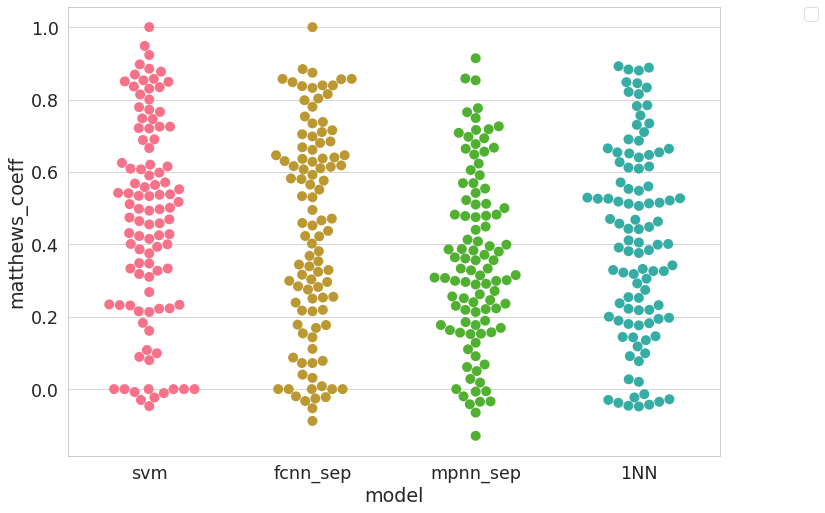

In [4]:
metric = 'matthews_coeff'
plots.MakeBoxPlotsSeaborn(table     = score,
                        xname     = 'model',
                        yname     = metric,
                        use_swarm = True,
                        )

/home/tamuras0/miniconda3/lib/python3.9/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


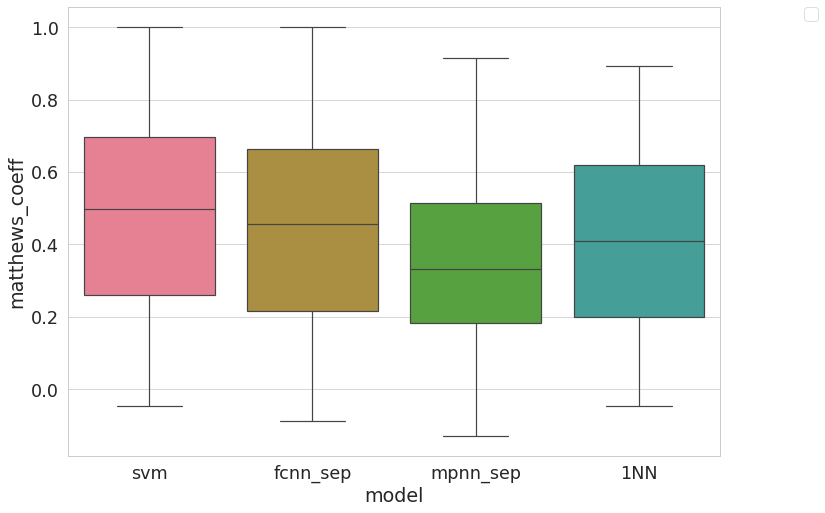

In [5]:
plots.MakeBoxPlotsSeaborn(table     = score,
                        xname     = 'model',
                        yname     = metric,
                        use_swarm = False,
                        )

In [8]:
pg.pairwise_tests(data=score, dv=metric, within='model', subject='subject', padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,model,1NN,fcnn_sep,True,True,-1.181309,99.0,two-sided,2.403099e-01,1.000000e+00,bonf,0.217,-0.092085
1,model,1NN,mpnn_sep,True,True,2.888888,99.0,two-sided,4.749556e-03,2.849734e-02,bonf,5.485,0.220929
2,model,1NN,svm,True,True,-2.923331,99.0,two-sided,4.292012e-03,2.575207e-02,bonf,6.001,-0.227574
3,model,fcnn_sep,mpnn_sep,True,True,3.865125,99.0,two-sided,1.985570e-04,1.191342e-03,bonf,97.612,0.305495
4,model,fcnn_sep,svm,True,True,-1.657745,99.0,two-sided,1.005346e-01,6.032073e-01,bonf,0.414,-0.127524
5,model,mpnn_sep,svm,True,True,-5.801259,99.0,two-sided,7.910386e-08,4.746232e-07,bonf,1.534e+05,-0.451858


# AXV cpdout

In [9]:
def LoadData():
    
    dir_score = './Score_axv/'
    file = 'mean_cpdout.tsv'
        
        
    svm     = pd.read_csv(dir_score + 'SVM/'            + file, sep='\t', index_col=0)
    xgb     = pd.read_csv(dir_score + 'XGBoost/'        + file, sep='\t', index_col=0)
    rf      = pd.read_csv(dir_score + 'Random_Forest/'  + file, sep='\t', index_col=0)
    fcn     = pd.read_csv(dir_score + 'FCNN/'           + file, sep='\t', index_col=0)
    fcn_sep = pd.read_csv(dir_score + 'FCNN_separated/' + file, sep='\t', index_col=0)
    mpn     = pd.read_csv(dir_score + 'MPNN/'           + file, sep='\t', index_col=0)
    mpn_sep = pd.read_csv(dir_score + 'MPNN_separated/' + file, sep='\t', index_col=0)
    nn1     = pd.read_csv(dir_score + '1NN/'        + file, sep='\t', index_col=0)
    nn5     = pd.read_csv(dir_score + '5NN/'        + file, sep='\t', index_col=0)


    svm     = assign_vals(svm, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    xgb     = assign_vals(xgb, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    rf      = assign_vals(rf , cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    fcn     = assign_vals(fcn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    fcn_sep = assign_vals(fcn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    mpn     = assign_vals(mpn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    mpn_sep = assign_vals(mpn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    nn1     = assign_vals(nn1, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    nn5     = assign_vals(nn5, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])


    svm['model']     = 'svm'
    xgb['model']     = 'xgb'
    rf['model']      = 'rf'
    fcn['model']     = 'fcnn'
    fcn_sep['model'] = 'fcnn_sep'
    mpn['model']     = 'mpnn'
    mpn_sep['model'] = 'mpnn_sep'
    nn1['model']     = '1NN'
    nn5['model']     = '5NN'


    # all_score = pd.concat([svm, xgb, rf, fcn, fcn_sep, mpn, mpn_sep, nn1, nn5])
    all_score = pd.concat([svm, fcn_sep, mpn_sep, nn1])
    all_score['subject'] = all_score.index.tolist()
    return all_score

In [10]:
score = LoadData()

/home/tamuras0/miniconda3/lib/python3.9/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


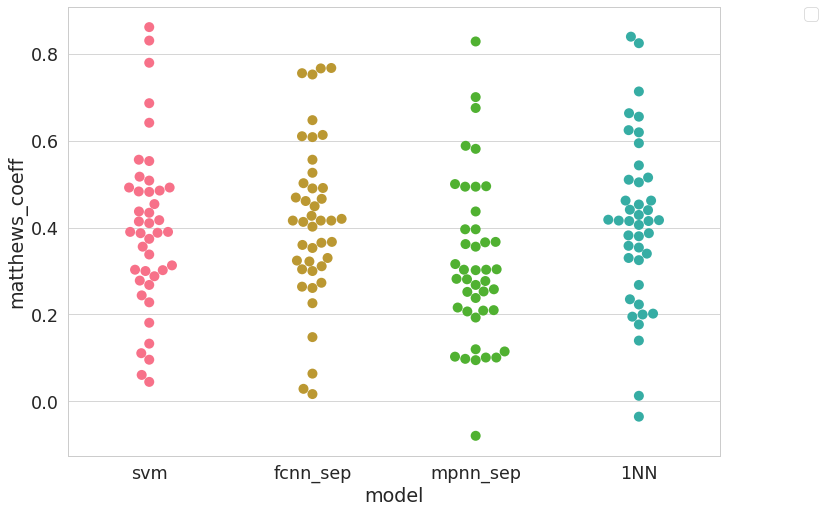

In [11]:
plots.MakeBoxPlotsSeaborn(table     = score,
                        xname     = 'model',
                        yname     = metric,
                        use_swarm = True,
                        )

/home/tamuras0/miniconda3/lib/python3.9/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


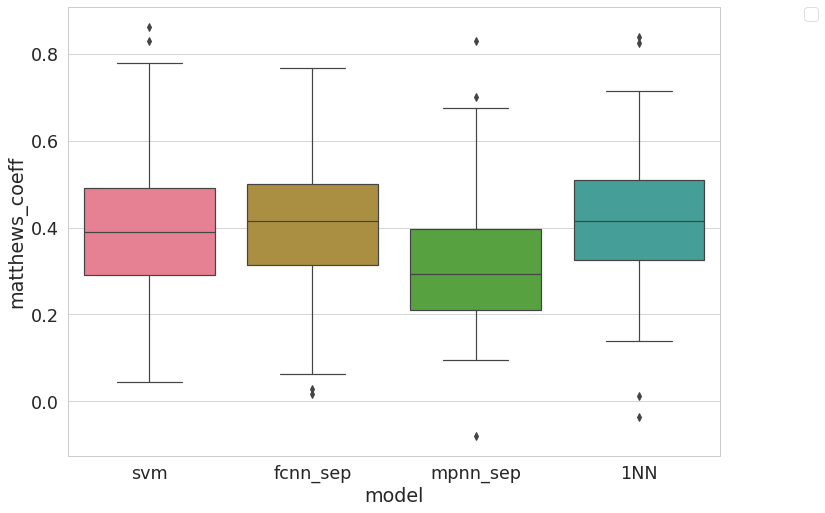

In [12]:
plots.MakeBoxPlotsSeaborn(table     = score,
                        xname     = 'model',
                        yname     = metric,
                        use_swarm = False,
                        )

In [15]:
pg.pairwise_tests(data=score, dv=metric, within='model', subject='subject', padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,model,1NN,fcnn_sep,True,True,-0.260097,41.0,two-sided,0.796091,1.000000,bonf,0.172,-0.025887
1,model,1NN,mpnn_sep,True,True,4.279783,41.0,two-sided,0.000110,0.000657,bonf,221.011,0.489529
2,model,1NN,svm,True,True,0.699477,41.0,two-sided,0.488203,1.000000,bonf,0.21,0.067834
3,model,fcnn_sep,mpnn_sep,True,True,4.242190,41.0,two-sided,0.000123,0.000739,bonf,198.794,0.524435
4,model,fcnn_sep,svm,True,True,0.989818,41.0,two-sided,0.328069,1.000000,bonf,0.264,0.094909
5,model,mpnn_sep,svm,True,True,-3.749665,41.0,two-sided,0.000548,0.003286,bonf,51.56,-0.421148


# AXV bothout

In [16]:
def LoadData():
    
    dir_score = './Score_axv/'
    file = 'mean_bothout.tsv'
        
        
    svm     = pd.read_csv(dir_score + 'SVM/'            + file, sep='\t', index_col=0)
    xgb     = pd.read_csv(dir_score + 'XGBoost/'        + file, sep='\t', index_col=0)
    rf      = pd.read_csv(dir_score + 'Random_Forest/'  + file, sep='\t', index_col=0)
    fcn     = pd.read_csv(dir_score + 'FCNN/'           + file, sep='\t', index_col=0)
    fcn_sep = pd.read_csv(dir_score + 'FCNN_separated/' + file, sep='\t', index_col=0)
    mpn     = pd.read_csv(dir_score + 'MPNN/'           + file, sep='\t', index_col=0)
    mpn_sep = pd.read_csv(dir_score + 'MPNN_separated/' + file, sep='\t', index_col=0)
    nn1     = pd.read_csv(dir_score + '1NN/'        + file, sep='\t', index_col=0)
    nn5     = pd.read_csv(dir_score + '5NN/'        + file, sep='\t', index_col=0)


    svm     = assign_vals(svm, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    xgb     = assign_vals(xgb, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    rf      = assign_vals(rf , cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    fcn     = assign_vals(fcn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    fcn_sep = assign_vals(fcn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    mpn     = assign_vals(mpn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    mpn_sep = assign_vals(mpn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    nn1     = assign_vals(nn1, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
    nn5     = assign_vals(nn5, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])


    svm['model']     = 'svm'
    xgb['model']     = 'xgb'
    rf['model']      = 'rf'
    fcn['model']     = 'fcnn'
    fcn_sep['model'] = 'fcnn_sep'
    mpn['model']     = 'mpnn'
    mpn_sep['model'] = 'mpnn_sep'
    nn1['model']     = '1NN'
    nn5['model']     = '5NN'


    # all_score = pd.concat([svm, xgb, rf, fcn, fcn_sep, mpn, mpn_sep, nn1, nn5])
    all_score = pd.concat([svm, fcn_sep, mpn_sep, nn1])
    all_score['subject'] = all_score.index.tolist()
    return all_score

In [17]:
score = LoadData()

/home/tamuras0/miniconda3/lib/python3.9/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


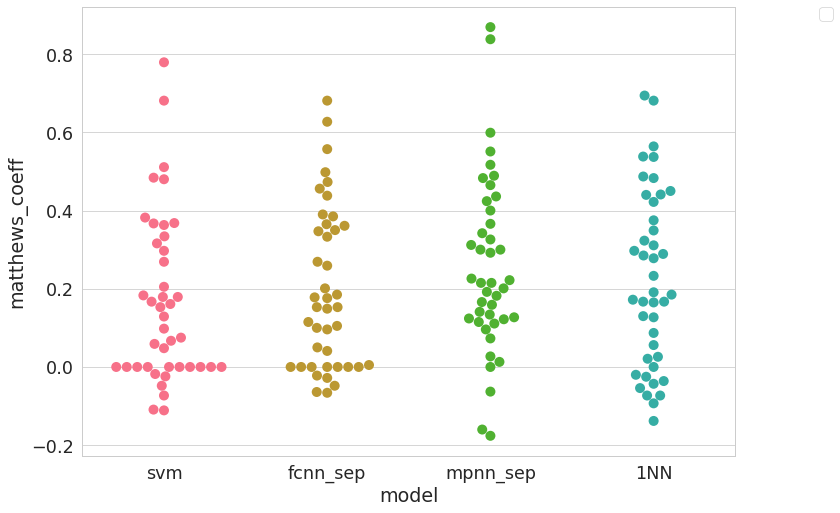

In [18]:
plots.MakeBoxPlotsSeaborn(table     = score,
                        xname     = 'model',
                        yname     = metric,
                        use_swarm = True,
                        )

/home/tamuras0/miniconda3/lib/python3.9/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


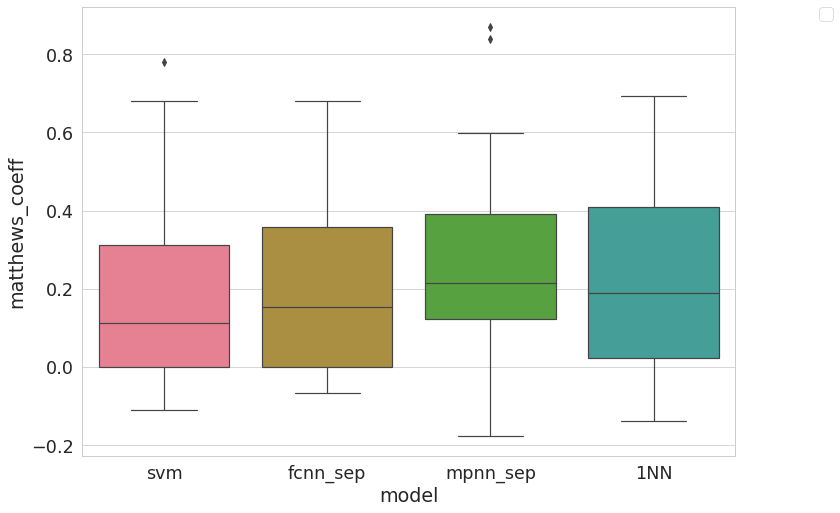

In [19]:
plots.MakeBoxPlotsSeaborn(table     = score,
                        xname     = 'model',
                        yname     = metric,
                        use_swarm = False,
                        )

In [22]:
pg.pairwise_tests(data=score, dv=metric, within='model', subject='subject', padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,model,1NN,fcnn_sep,True,True,1.023263,41.0,two-sided,0.312184,1.000000,bonf,0.272,0.125392
1,model,1NN,mpnn_sep,True,True,-0.929010,41.0,two-sided,0.358321,1.000000,bonf,0.25,-0.141311
2,model,1NN,svm,True,True,2.405201,41.0,two-sided,0.020761,0.124566,bonf,2.159,0.265006
3,model,fcnn_sep,mpnn_sep,True,True,-1.923570,41.0,two-sided,0.061371,0.368225,bonf,0.891,-0.272898
4,model,fcnn_sep,svm,True,True,1.082855,41.0,two-sided,0.285200,1.000000,bonf,0.288,0.148455
5,model,mpnn_sep,svm,True,True,2.804260,41.0,two-sided,0.007673,0.046039,bonf,5.029,0.409956


In [6]:
scores = []

for i, split in enumerate(['wodirection_trtssplit', 'axv']):
    for ml in ['SVM', 'Random_Forest', 'XGBoost', 'FCNN', 'FCNN_separated', 'MPNN', 'MPNN_separated', '1NN', '5NN']:
        
        if i==0:
            df = pd.read_csv('./Score_%s/%s/mean.tsv'%(split, ml), sep='\t', index_col=0)
        if i==1:
            df = pd.read_csv('./Score_%s/%s/mean_bothout.tsv'%(split, ml), sep='\t', index_col=0)
            
        df = assign_vals(df, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
        df['model'] = ml
        df['split'] = split
        
        scores += [df]



In [7]:
all_scores = pd.concat(scores, ignore_index=True)

/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


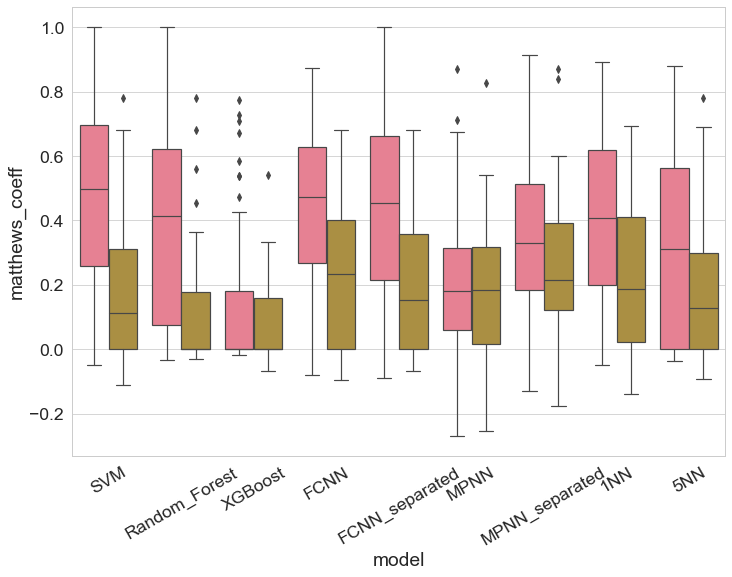

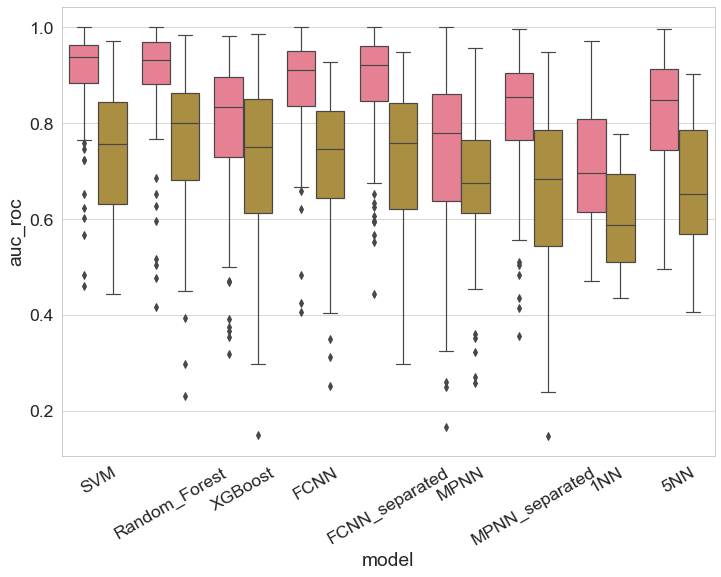

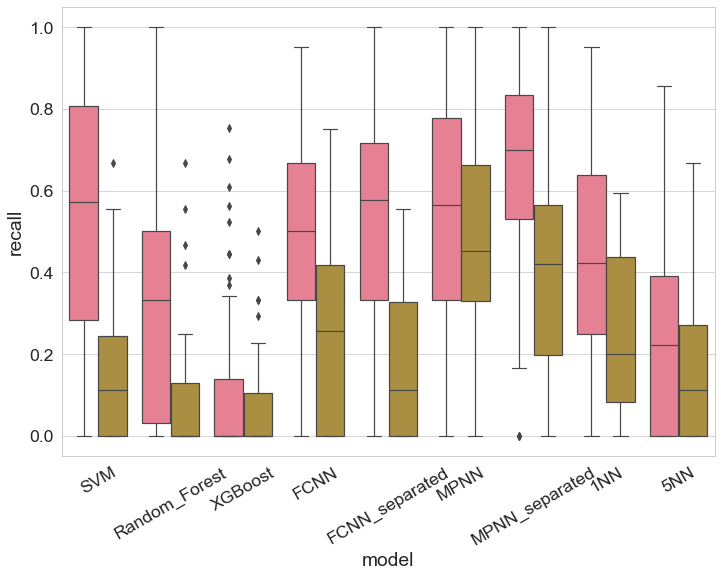

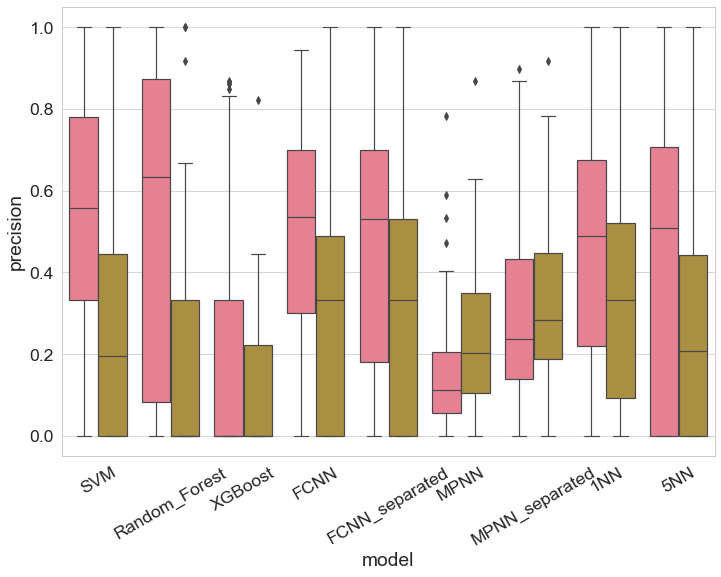

In [10]:
import matplotlib.pyplot as plt
import os
from figure import plots

for metric in ['matthews_coeff', 'auc_roc', 'recall', 'precision']:
    plots.MakeBoxPlotsSeaborn(table     = all_scores,
                            xname     = 'model',
                            yname     = metric,
                            hue       = 'split',
                            use_swarm = False,
                            rotate_x  = True,
                            show_legend = False,
                            )